In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
%matplotlib inline

In [2]:
df_first = pd.read_csv("data/C 75 1st MILL ( 2 mm to 1.5  mm ) all axises.csv")
df_second = pd.read_csv("data/C 75 2nd Mill ( 1.5 mm to 0.9 mm ) all axises.csv")

if each vibration reading is 70/100 seconds then the total time data = 

(70 * 2340)/100 = 1638.0 seconds for the first mill and 

(70 * 1151)/100 = 805.7 seconds for the second mill

In [3]:
df_first.head()

,X,Y,Z
0,376,40,15040
1,648,76,15084
2,560,176,14892
3,492,-56,15044
4,-68,-228,14968


In [4]:
def absoloute_creator(df,columns):
    for column in columns:
        mean = df[column].mean()
        df[column + " absoloute"] = df[column] - mean
        df[column + " absoloute"] = df[column + " absoloute"].abs()
        df[column + " absoloute"] = df[column + " absoloute"] + mean
        print(df[column].mean())
    return df

In [5]:
df_first = absoloute_creator(df_first,["X","Y","Z"])
df_second = absoloute_creator(df_second,["X","Y","Z"])

457.8017094017094
15.791452991452992
15070.360683760684
-735.3466550825369
850.3457862728062
14882.874022589052


In [6]:
df_first.head()     #df_second is the same

,X,Y,Z,X absoloute,Y absoloute,Z absoloute
0,376,40,15040,539.603419,40.000000,15100.721368
1,648,76,15084,648.000000,76.000000,15084.000000
2,560,176,14892,560.000000,176.000000,15248.721368
3,492,-56,15044,492.000000,87.582906,15096.721368
4,-68,-228,14968,983.603419,259.582906,15172.721368


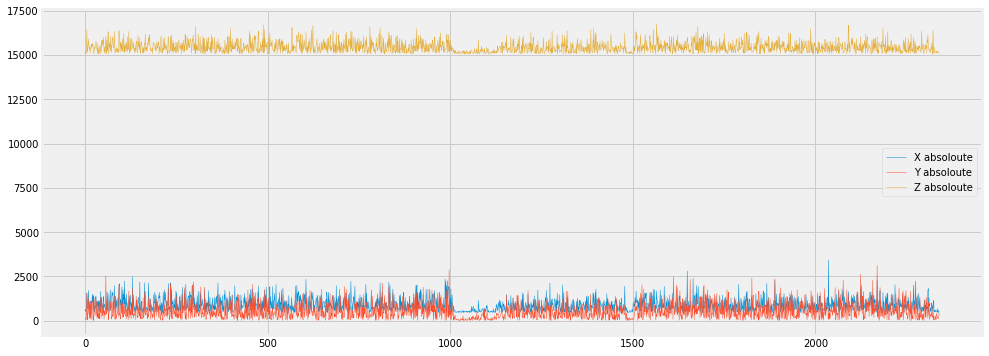

In [7]:
df_first[["X absoloute","Y absoloute","Z absoloute"]].plot(figsize=(15, 6),linewidth=0.5)
plt.show()

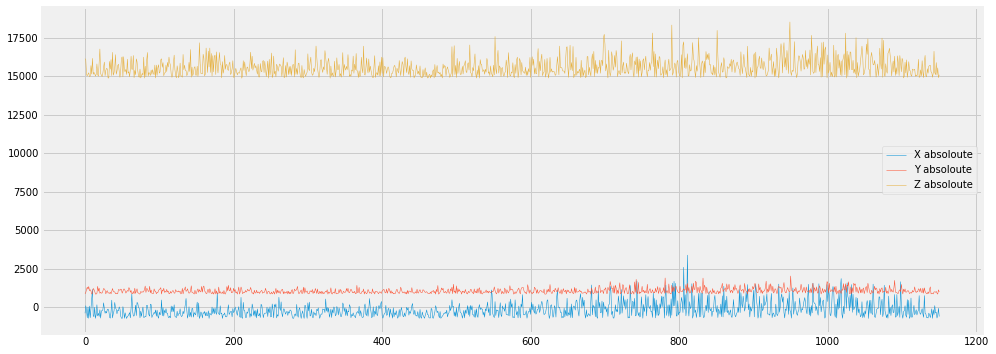

In [8]:
df_second[["X absoloute","Y absoloute","Z absoloute"]].plot(figsize=(15, 6),linewidth=0.5)
plt.show()

In [9]:
# import datetime

In [10]:
# df_first["Time"]  = 0

In [11]:
# df_first["Time"] = df_first.apply(lambda x : x.index)

In [12]:
df_first.head()

,X,Y,Z,X absoloute,Y absoloute,Z absoloute
0,376,40,15040,539.603419,40.000000,15100.721368
1,648,76,15084,648.000000,76.000000,15084.000000
2,560,176,14892,560.000000,176.000000,15248.721368
3,492,-56,15044,492.000000,87.582906,15096.721368
4,-68,-228,14968,983.603419,259.582906,15172.721368


In [13]:
# df_first.index = df_first.index[::-1]
# df_second.index = df_second.index[::-1]

In [14]:
# df_first = df_first.iloc[::-1]
# df_second = df_second.iloc[::-1]


In [15]:
df_first.head()

,X,Y,Z,X absoloute,Y absoloute,Z absoloute
0,376,40,15040,539.603419,40.000000,15100.721368
1,648,76,15084,648.000000,76.000000,15084.000000
2,560,176,14892,560.000000,176.000000,15248.721368
3,492,-56,15044,492.000000,87.582906,15096.721368
4,-68,-228,14968,983.603419,259.582906,15172.721368


In [27]:
pred_first=pd.DataFrame(index=range(df_first.shape[0]*10),columns=df_first.columns).fillna(0)


In [28]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fitx=ExponentialSmoothing(np.asarray(df_first["X absoloute"]),seasonal_periods=df_first.shape[1],trend='add',seasonal='add').fit()
fity=ExponentialSmoothing(np.asarray(df_first["Y absoloute"]),seasonal_periods=df_first.shape[1],trend='add',seasonal='add').fit()
fitz=ExponentialSmoothing(np.asarray(df_first["Z absoloute"]),seasonal_periods=df_first.shape[1],trend='add',seasonal='add').fit()

pred_first["X absoloute"]=fitx.forecast(len(pred_first))
pred_first["Y absoloute"]=fity.forecast(len(pred_first))
pred_first["Z absoloute"]=fitz.forecast(len(pred_first))

In [29]:
pred_second=pd.DataFrame(index=range(df_second.shape[0]*10),columns=df_second.columns).fillna(0)

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fitx=ExponentialSmoothing(np.asarray(df_second["X absoloute"]),seasonal_periods=df_first.shape[1],trend='add',seasonal='add').fit()
fity=ExponentialSmoothing(np.asarray(df_second["Y absoloute"]),seasonal_periods=df_first.shape[1],trend='add',seasonal='add').fit()
fitz=ExponentialSmoothing(np.asarray(df_second["Z absoloute"]),seasonal_periods=df_first.shape[1],trend='add',seasonal='add').fit()

pred_second["X absoloute"]=fitx.forecast(len(pred_second))
pred_second["Y absoloute"]=fity.forecast(len(pred_second))
pred_second["Z absoloute"]=fitz.forecast(len(pred_second))

In [31]:
df_first.head()

,X,Y,Z,X absoloute,Y absoloute,Z absoloute
0,376,40,15040,539.603419,40.000000,15100.721368
1,648,76,15084,648.000000,76.000000,15084.000000
2,560,176,14892,560.000000,176.000000,15248.721368
3,492,-56,15044,492.000000,87.582906,15096.721368
4,-68,-228,14968,983.603419,259.582906,15172.721368


In [43]:
def absoloute_creator_two(df,columns):
    for column in columns:
        beginning = df[column].max()
        df[column + " reversed"] = df[column] - beginning
        df[column + " reversed"] = df[column + " reversed"].abs()
        df[column + " reversed"] = df[column + " reversed"] + beginning
        print(beginning)
    return df

In [47]:
pred_first = absoloute_creator_two(pred_first,["X absoloute","Y absoloute","Z absoloute"])
pred_second = absoloute_creator_two(pred_second,["X absoloute","Y absoloute","Z absoloute"])

731.0941671380284
327.25390702578255
15362.096777353741
-298.67989752418174
1039.6135981401028
15454.956649212421


In [48]:
pred_first.head()

,X,Y,Z,X absoloute,Y absoloute,Z absoloute,X absoloute reversed,Y absoloute reversed,Z absoloute reversed
0,0,0,0,718.812478,327.253907,15362.096777,743.375856,327.253907,15362.096777
1,0,0,0,691.487334,162.612083,15211.025265,770.701001,491.895731,15513.168289
2,0,0,0,731.094167,216.738771,15195.774740,731.094167,437.769043,15528.418814
3,0,0,0,699.113119,91.879395,15251.670277,763.075215,562.628420,15472.523278
4,0,0,0,692.405229,182.954230,15216.367892,769.783106,471.553584,15507.825663


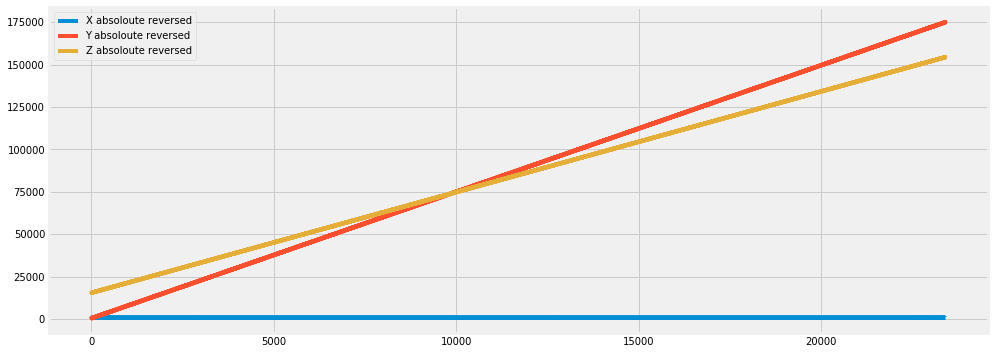

In [49]:
pred_first[["X absoloute reversed","Y absoloute reversed","Z absoloute reversed"]][:].plot(figsize=(15, 6),linewidth=4)
plt.show()

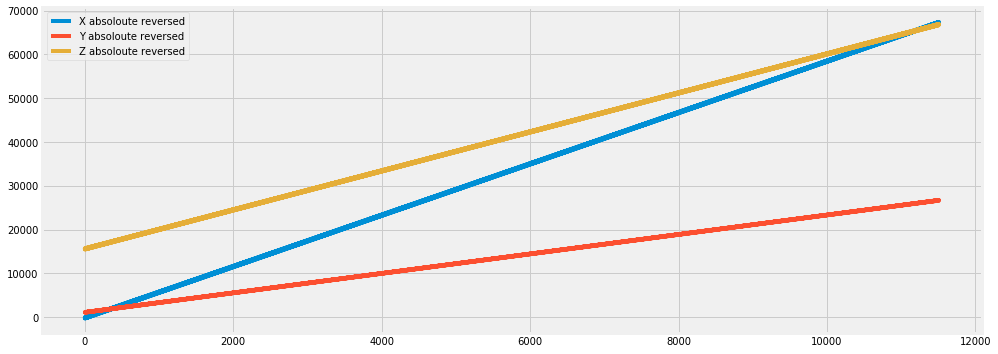

In [50]:
pred_second[["X absoloute reversed","Y absoloute reversed","Z absoloute reversed"]][:].plot(figsize=(15, 6),linewidth=4)
plt.show()